In [143]:
### ARCHITECTURE SEARCH : averaging psychophysical results across architectures ###
import sys
import os
import json
import numpy as np
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt

import importlib
import util_human_model_comparison
import util_figures_psychophysics

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures


def load_results_dict(results_dict_fn, pop_key_list=['psychometric_function']):
    with open(results_dict_fn) as f: results_dict = json.load(f)
    for pop_key in pop_key_list:
        if pop_key in results_dict.keys():
            results_dict.pop(pop_key)
    return results_dict

def calc_best_metric(valid_metrics_fn, metric_key='f0_label:accuracy', maximize=True):
    with open(valid_metrics_fn) as f: valid_metrics_dict = json.load(f)
    metric_values = valid_metrics_dict[metric_key]
    if maximize: best_metric_value = np.max(metric_values)
    else: best_metric_value = np.min(metric_values)
    return best_metric_value

# ### Specify scope of all models to compare (regex must grab all model output directories)
# # regex_model_dir = '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01/arch_*/'
# # regex_model_dir = '/nobackup/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01/arch_*/'

# # regex_model_dir = '/saved_models/models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase01_filter_signalLPv00_AN_BW10eN1_IHC3000Hz_classification*/'
# # regex_model_dir = '/saved_models/models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase01_filter_signalBPv00_AN_BW10eN1_IHC3000Hz_classification*/'
# # regex_model_dir = '/saved_models/models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase01_filter_signalHPv00_AN_BW10eN1_IHC3000Hz_classification*/'

# tmp_list_model_dir = sorted(glob.glob(regex_model_dir))


# Specify list of models to load (each entry can glob multiple models to average across)
list_regex_model_dir = [
    'human',
    '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_pos10pos30_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_posInf_AN_BW10eN1_IHC3000Hz_classification*/',

#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_sr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC0050Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC0250Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC1000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC6000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC9000Hz_classification*/',

#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW05eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW20eN1_IHC3000Hz_classification*/',

#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_filter_signalBPv00_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_filter_signalHPv00_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase0_filter_signalLPv00_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase0_filter_signalBPv00_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase0_filter_signalHPv00_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08spch_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08inst_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',

#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_spont1eN1_BW10eN1_IHC3000Hz_classification*/',

#     '/nobackup/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_sr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC0250Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC1000Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC6000Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC9000Hz_IHC7order/arch_*/',

#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/',
#     '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_*/',

#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification0/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification1/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification2/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification3/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification4/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification5/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification6/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification7/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification8/',
#     '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification9/',

]

# Specify basename for validation metrics
basename_valid_metrics = 'validation_metrics.json'

# Specify results_dict basenames for each experiment
experiment_to_basename_map = {
    'bernox2005': 'EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json',
    'transposedtones': 'EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_results_dict.json',
    'freqshiftedcomplexes': 'EVAL_SOFTMAX_mooremoore2003_080to480Hz_bestckpt_results_dict.json',
    'mistunedharmonics': 'EVAL_SOFTMAX_MistunedHarm_v01_bestckpt_results_dict.json',
    'altphasecomplexes': 'EVAL_SOFTMAX_AltPhase_v01_bestckpt_results_dict.json',
}

# Specify human results_dict for each experiment
experiment_to_human_results_map = {
    'bernox2005': util_human_model_comparison.get_human_results_dict_bernox2005(),
    'transposedtones': util_human_model_comparison.get_human_results_dict_transposedtones(),
    'freqshiftedcomplexes': util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes(),
    'mistunedharmonics': util_human_model_comparison.get_human_results_dict_mistunedharmonics(),
    'altphasecomplexes': util_human_model_comparison.get_human_results_dict_altphasecomplexes(),
}

# Specify list of experiments to load
experiment_keys = [
    'bernox2005',
    'altphasecomplexes',
    'freqshiftedcomplexes',
    'mistunedharmonics',
    'transposedtones',
]

# Compile list of lists of model psychophysical data to plot grid of results (models-by-experiments) 
list_list_model_dir = []
list_list_valid_metric = []
list_dict_results_dicts = []
# For each entry in list_regex_model_dir, grab all of the models that are globbed by the regex
for regex_model_dir in list_regex_model_dir:
    list_model_dir = []
    list_valid_metric = []
    dict_results_dicts = {ek: [] for ek in experiment_keys}
    if 'HUMAN' in regex_model_dir.upper():
        list_model_dir = 'HUMAN'
        list_valid_metric = None
        dict_results_dicts = experiment_to_human_results_map
    else:
        for idx, model_dir in enumerate(sorted(glob.glob(regex_model_dir))):
            fn_valid_metric = os.path.join(model_dir, basename_valid_metrics)
            fn_result_dict = {
                ek: os.path.join(model_dir, experiment_to_basename_map[ek]) for ek in experiment_keys
            }
            include_model_flag = True
            for ek in experiment_keys:
                if not os.path.exists(fn_result_dict[ek]): include_model_flag = False
            if include_model_flag:
                list_valid_metric.append(calc_best_metric(fn_valid_metric))
                list_model_dir.append(model_dir)
                # Load results_dict for each model
                for ek, results_dict_fn in fn_result_dict.items():
                    with open(results_dict_fn) as f:
                        dict_results_dicts[ek].append(json.load(f))
    
    # Add lists of model results to the master list
    list_list_valid_metric.append(list_valid_metric)
    list_list_model_dir.append(list_model_dir)
    list_dict_results_dicts.append(dict_results_dicts)
    print(regex_model_dir, len(list_model_dir), list_valid_metric)


/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/ 10 [0.23791812360286713, 0.2496333122253418, 0.24383048713207245, 0.24158507585525513, 0.2286197990179062, 0.2425256222486496, 0.22342178225517273, 0.2529025971889496, 0.24381381273269653, 0.24805223941802979]
/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_spont1eN1_BW10eN1_IHC3000Hz_classification*/ 10 [0.20544898509979248, 0.24653783440589905, 0.2382229119539261, 0.23584416508674622, 0.237449049949646, 0.24272802472114563, 0.23994924128055573, 0.23521791398525238, 0.23834197223186493, 0.23928727209568024]


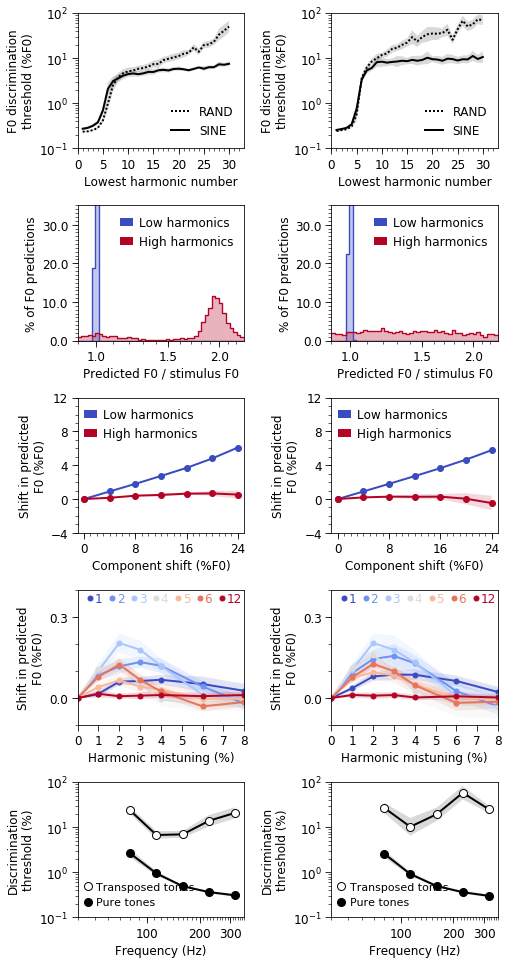

/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/psychophysics_all_manipulation_spont_rate.pdf


In [144]:
importlib.reload(util_figures)
importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)

experiment_to_plot_fcn_map = {
    'bernox2005': util_figures_psychophysics.make_bernox_threshold_plot,
    'transposedtones': util_figures_psychophysics.make_TT_threshold_plot,
    'freqshiftedcomplexes': util_figures_psychophysics.make_freqshiftedcomplexes_plot,
#     'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_bar_graph,
#     'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_line_graph,
    'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_line_plot,
    'altphasecomplexes': util_figures_psychophysics.make_altphase_histogram_plot,
#     'altphasecomplexes': util_figures_psychophysics.make_altphase_line_plot,
}

experiment_keys = [
    'bernox2005',
    'altphasecomplexes',
    'freqshiftedcomplexes',
    'mistunedharmonics',
    'transposedtones',
]

NROWS = len(experiment_keys)
NCOLS = len(list_dict_results_dicts)
figsize = (4*NCOLS*0.9, 3*NROWS*0.9)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)
ax = ax.reshape([NROWS, NCOLS])

for c_idx, (dict_results_dicts, list_model_dir) in enumerate(zip(list_dict_results_dicts, list_list_model_dir)):
    for r_idx, key in enumerate(experiment_keys):
        results_dict_input = dict_results_dicts[key]
        plot_fcn = experiment_to_plot_fcn_map[key]
        # Specify kwargs for all psychophysics subplots
        kwargs = {
            'include_yerr': True,
        }
        # Modify kwargs for special cases
        if (isinstance(list_model_dir, str)) and (list_model_dir == 'HUMAN'):
            kwargs['include_yerr'] = False
        plot_fcn(ax[r_idx, c_idx], results_dict_input, **kwargs)

plt.tight_layout()
plt.show()

save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/'
# save_fn = os.path.join(save_dir, 'psychophysics_all_HUMANS_and_arch0302.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_sound_statistics_SNR.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_sound_statistics_training_stimuli.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_IHClowpass.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_IHClowpass_rep10archs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_cochFilterBWs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_cochFilterBWs_rep10archs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_all_manipulation_spont_rate.pdf')
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0)
# print(save_fn)

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0)


In [138]:
# for r in range(ax.shape[0]):
#     for c in range(ax.shape[1]):
#         bbox_inches = ax[r, c].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
#         save_fn = os.path.join(save_dir, 'tmp_{}{}.pdf'.format(r, c))
#         fig.savefig(save_fn, bbox_inches=bbox_inches, pad_inches=0)


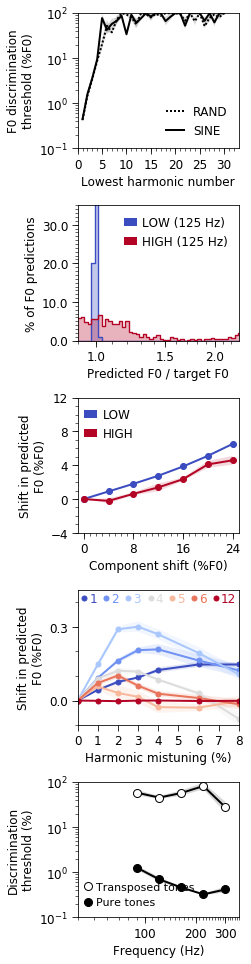

/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/psychophysics_all_PND_v08_TLAS_snr_posInf_AN_BW10eN1_IHC3000Hz_classification.pdf


In [16]:
NROWS = len(experiment_keys)
NCOLS = 1
figsize = (4*NCOLS*0.9, 3*NROWS*0.9)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)
ax = np.array(ax).reshape([-1])

experiment_to_human_results_map = {
    'bernox2005': util_human_model_comparison.get_human_results_dict_bernox2005(),
    'transposedtones': util_human_model_comparison.get_human_results_dict_transposedtones(),
    'freqshiftedcomplexes': util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes(),
    'mistunedharmonics': util_human_model_comparison.get_human_results_dict_mistunedharmonics(),
    'altphasecomplexes': util_human_model_comparison.get_human_results_dict_altphasecomplexes(),
}

for ax_idx, key in enumerate(experiment_keys):
    plot_fcn = experiment_to_plot_fcn_map[key]
    kwargs = {
        'include_yerr': True,
    }
    plot_fcn(ax[ax_idx], results_dicts[key], **kwargs)
#     plot_fcn(ax[ax_idx], experiment_to_human_results_map[key], **kwargs)

plt.tight_layout()
plt.show()

# model_name = regex_model_dir
# model_name = model_name.replace('/saved_models/models_sr20000/arch_0302/', '')
# model_name = model_name.replace('*/', '')
# # model_name = 'arch_search_v01_rank_{:03}to{:03}'.format(idxxx, idxxx+40)
# # model_name = 'HUMANS'
# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/'
# save_fn = os.path.join(save_dir, 'psychophysics_all_{}.pdf')
# save_fn = save_fn.format(model_name)
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0)
# print(save_fn)


In [ ]:
experiment_keys_tmp = ['mistunedharmonics']

NROWS = len(experiment_keys_tmp)
NCOLS = 1
figsize = (2*4*NCOLS*0.9, 2*3*NROWS*0.9)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)
ax = np.array(ax).reshape([-1])

experiment_to_human_results_map = {
    'bernox2005': util_human_model_comparison.get_human_results_dict_bernox2005(),
    'transposedtones': util_human_model_comparison.get_human_results_dict_transposedtones(),
    'freqshiftedcomplexes': util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes(),
    'mistunedharmonics': util_human_model_comparison.get_human_results_dict_mistunedharmonics(),
    'altphasecomplexes': util_human_model_comparison.get_human_results_dict_altphasecomplexes(),
}

for ax_idx, key in enumerate(experiment_keys_tmp):
    plot_fcn = experiment_to_plot_fcn_map[key]
    kwargs = {
        'include_yerr': True,
    }
    plot_fcn(ax[ax_idx], results_dicts[key], **kwargs)
#     plot_fcn(ax[ax_idx], experiment_to_human_results_map[key], **kwargs)

plt.tight_layout()
plt.show()



In [ ]:
importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
_ = util_figures_psychophysics.make_altphase_histogram_plot(ax, experiment_to_human_results_map['altphasecomplexes'])
plt.show()



# fig, ax = util_figures_psychophysics.make_altphase_histograms(top_model_results_dicts['altphasecomplexes'])
# plt.show()


In [ ]:
### GENERIC PARAMETERS
figsize=(4,3)
poster_plot_kwargs = {
    'fontsize_labels': 16,
    'fontsize_legend': 14,
    'fontsize_ticks': 14,
    'include_yerr': True,
    'kwargs_bootstrap': {
        'bootstrap_repeats': 1000,
        'metric_function': 'median',
    },
}

### Build dictionary of human results_dict for each experiment
experiment_to_human_results_map = {
    'bernox2005': util_human_model_comparison.get_human_results_dict_bernox2005(),
    'transposedtones': util_human_model_comparison.get_human_results_dict_transposedtones(),
    'freqshiftedcomplexes': util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes(),
    'mistunedharmonics': util_human_model_comparison.get_human_results_dict_mistunedharmonics(),
    'altphasecomplexes': util_human_model_comparison.get_human_results_dict_altphasecomplexes(),
}


In [ ]:
### bernox2005 discrimination threholds

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_bernox2005()

kwargs = copy.deepcopy(poster_plot_kwargs)
kwargs['xlimits'] = [0, 33]
kwargs['ylimits'] = [0.15, 50]
kwargs['threshold_cap'] = 50

# PLOT MODEL
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, results_dicts['bernox2005'], **kwargs)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_bernox_threshold_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')


# PLOT HUMAN
sine_plot_kwargs={'marker': '.', 'ms':12}
rand_plot_kwargs={'marker': '.', 'ms':12}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, human_rd, **kwargs,
         sine_plot_kwargs=sine_plot_kwargs,
         rand_plot_kwargs=rand_plot_kwargs)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/'
# save_fn = os.path.join(save_dir, 'human_bernox_threshold_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

plt.show()

In [ ]:
### transposed tones discrimination thresholds

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_TT_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_transposedtones()

kwargs = copy.deepcopy(poster_plot_kwargs)
kwargs['fontsize_legend'] = 11
kwargs['xlimits'] = [40, 360]
kwargs['ylimits'] = [0.15, 50]
kwargs['threshold_cap'] = 50

# PLOT MODEL
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, results_dicts['transposedtones'], **kwargs)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_transposedtones_threshold_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

# PLOT HUMAN
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, human_rd, **kwargs)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/'
# save_fn = os.path.join(save_dir, 'human_transposedtones_threshold_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

plt.show()

In [ ]:
### frequency shifted complexes

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_freqshiftedcomplexes_plot
human_rd = util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes()

kwargs = copy.deepcopy(poster_plot_kwargs)
kwargs['restrict_conditions'] = ['5', '11', '16']
# kwargs['cmap_name'] = ['r', 'b', 'k']#'Dark2'

# PLOT MODEL
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, results_dicts['freqshiftedcomplexes'], **kwargs, use_relative_shift=True)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_freqshift_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

# PLOT HUMAN
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, human_rd, **kwargs, use_relative_shift=True)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/'
# save_fn = os.path.join(save_dir, 'human_freqshift_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

plt.show()

In [ ]:
### mistuned harmonics bar graph

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_mistuned_harmonics_bar_graph
human_rd = util_human_model_comparison.get_human_results_dict_mistunedharmonics()

kwargs = copy.deepcopy(poster_plot_kwargs)
kwargs['cmap_name'] = 'tab10'

# PLOT MODEL
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, results_dicts['mistunedharmonics'], **kwargs, use_relative_shift=True)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_mistunedharm_bar_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

# PLOT HUMAN
kwargs_human = copy.deepcopy(kwargs)
kwargs_human['include_yerr'] = False
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, human_rd, **kwargs_human, use_relative_shift=True)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/'
# save_fn = os.path.join(save_dir, 'human_mistunedharm_bar_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

plt.show()

In [ ]:
### mistuned harmonics line plot

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_mistuned_harmonics_line_plot
human_rd = util_human_model_comparison.get_human_results_dict_mistunedharmonics()

kwargs = copy.deepcopy(poster_plot_kwargs)
# kwargs['cmap_name'] = 'Accent'
kwargs['ylimits'] = [-0.1, 0.4]
kwargs['yticks'] = 0.2

# PLOT MODEL
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, results_dicts['mistunedharmonics'], **kwargs, use_relative_shift=True)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_mistunedharm_line200Hz_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')


plt.show()

In [ ]:
### alt phase line plot

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_altphase_line_plot
human_rd = util_human_model_comparison.get_human_results_dict_altphasecomplexes(average_conditions=False)

kwargs = copy.deepcopy(poster_plot_kwargs)
kwargs['fontsize_legend'] = 13

# PLOT MODEL
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, results_dicts['altphasecomplexes'], **kwargs)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_altphase_line_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

# PLOT HUMAN
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plot_fcn(ax, human_rd, **kwargs)
plt.tight_layout()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/'
# save_fn = os.path.join(save_dir, 'human_altphase_line_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')

plt.show()

In [ ]:
### altphase histograms

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)

# PLOT MODEL
fig, ax = util_figures_psychophysics.make_altphase_histograms(results_dicts['altphasecomplexes'],
                                                              bin_step=0.01,
                                                              figsize=(8,5),
                                                              fontsize_labels=18,
                                                              fontsize_legend=16,
                                                              fontsize_ticks=14,
                                                              xticks=[1.0, 1.5, 2.0],
                                                              xlimits=[0.9, 2.3],
                                                              yticks=5,
                                                              ylimits=[0, 25],
                                                              condition_plot_labels={})

plt.show()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_11_07_manipulating_bez2018model/'
# save_fn = os.path.join(save_dir, 'arch0628_spike_counts_npc20_altphase_histogram_plot.pdf')
# fig.savefig(save_fn, bbox_inches='tight')


In [174]:
import sys
import os
import json
import numpy as np
import glob
import copy
import importlib
%matplotlib inline
import matplotlib.pyplot as plt

import util_human_model_comparison
import util_figures_psychophysics
importlib.reload(util_figures_psychophysics)

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures


### SPECIFY THE OUTERMOST DIRECTORY CONTAINING ALL MODELS
model_dir = '/om2/user/msaddler/pitchnet/saved_models/'

### SPECIFY RESULTS DICT BASENAME: determines which experiment to plot
results_dict_basename = 'EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json'

### SPECIFY REGULAR EXPRESSIONS FOR MODELS: (regex, model_name) pairs
master_list = [
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', 'HSR'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_spont1eN1_BW10eN1_IHC3000Hz_classification*/', 'LSR'),
    
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '50Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC0250Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '250Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC1000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '1000Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '3000Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC6000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '6000Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC9000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '9000Hz'),
#     ('/nobackup/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_sr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/*/', '50Hz**'),
    
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC0050Hz_classification*/', '50Hz'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC0250Hz_classification*/', '250Hz'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC1000Hz_classification*/', '1000Hz'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', '3000Hz'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC6000Hz_classification*/', '6000Hz'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC9000Hz_classification*/', '9000Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_sr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order_classification*/', '50Hz**'),
    
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '2x narrower BWs'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', 'Human filter BWs'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '2x broader BWs'),

    ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW05eN1_IHC3000Hz_classification*/', '2x narrower BWs'),
    ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', 'Human filter BWs'),
    ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW20eN1_IHC3000Hz_classification*/', '2x broader BWs'),

#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_TEST_BW05eN1_IHC3000Hz_ANMODEL_bernox2005_FixedFilter_bestckpt_results_dict.json', '0.5x test only'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '1.0x test only'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_TEST_BW20eN1_IHC3000Hz_ANMODEL_bernox2005_FixedFilter_bestckpt_results_dict.json', '2.0x test only'),

#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_test_AN_BW05eN1_bernox2005_FixedFilter_bestckpt_results_dict.json', '0.5x test only'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '1.0 test only'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_test_AN_BW20eN1_bernox2005_FixedFilter_bestckpt_results_dict.json', '2.0x test only'),

#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW05eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '0.5x train + test'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '1.0x train + test'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW20eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '2.0x train + test'),

#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_test_AN_BW30eN1_bernox2005_FixedFilter_bestckpt_results_dict.json', '3.0x Test'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW30eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json', '3.0x Train'),
    
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_posInf_AN_BW10eN1_IHC3000Hz_classification*/', r'$+\infty$ dB SNR'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_pos10pos30_AN_BW10eN1_IHC3000Hz_classification*/', r'$+10$ to $+30$ dB SNR'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', r'$-10$ to $+10$ dB SNR'),

#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', 'Speech + Music (natural)'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_filter_signalBPv00_AN_BW10eN1_IHC3000Hz_classification*/', 'Speech + Music (bandpass)'),
#     ('models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_filter_signalHPv00_AN_BW10eN1_IHC3000Hz_classification*/', 'Speech + Music (highpass)'),
#     ('models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase0_filter_signalLPv00_AN_BW10eN1_IHC3000Hz_classification*/', 'lowpass'),
#     ('models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase0_filter_signalBPv00_AN_BW10eN1_IHC3000Hz_classification*/', 'bandpass'),
#     ('models_sr20000/arch_0302/PND_synthetic_noise_UMNm_snr_neg10pos10_phase0_filter_signalHPv00_AN_BW10eN1_IHC3000Hz_classification*/', 'highpass'),
#     ('models_sr20000/arch_0302/PND_v08spch_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', 'Speech only'),
#     ('models_sr20000/arch_0302/PND_v08inst_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', 'Music only'),
]

### LOAD PSYCHOPHYSICS EXPERIMENT RESULTS
model_keys = []
results_dicts = {}
master_count = 0
for fn_regex, model_key in master_list:
    results_dicts[model_key] = []
    model_keys.append(model_key)
    if not fn_regex[0] == '/': fn_regex = os.path.join(model_dir, fn_regex)
    if '.json' not in fn_regex: fn_regex = os.path.join(fn_regex, results_dict_basename)
    for results_dict_fn in sorted(glob.glob(fn_regex)):
        master_count = master_count + 1
        with open(results_dict_fn) as f:
            results_dicts[model_key].append(json.load(f))

print('Loaded results from {} files ({})'.format(master_count, results_dict_basename))
for key in results_dicts.keys():
    print(key, len(results_dicts[key]))


Loaded results from 30 files (EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json)
Human filter BWs 10
2x narrower BWs 10
2x broader BWs 10


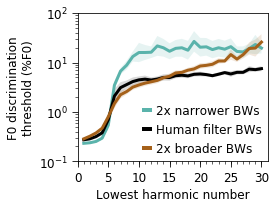

In [175]:
### bernox2005 discrimination threholds

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_bernox2005()

kwargs = {
    'xlimits': [0,31],
    'include_yerr': True,
    'legend_on': True,
    'restrict_conditions': [0],
    'kwargs_legend': {
        'ncol': 2,
        'handlelength': 0.5,
        'borderpad': 0,
        'columnspacing': 1,
        'loc': 'lower right',
        'handletextpad':0.5,
    },
}
# kwargs['kwargs_legend'] = {
#     'loc': 'upper left',
# #     'loc':'best', 'bbox_to_anchor': (0.5, 0.27, 0.5, 0.5),
#     'frameon': True,
#     'framealpha': 1.0,
#     'facecolor': 'w',
#     'edgecolor': 'k',
#     'handlelength': 0.5,
#     'markerscale': 0.0,
#     'fontsize': 10,
#     'borderpad': 0.5,
#     'borderaxespad': 0.25,
# }
if len(model_keys) < 4:
    kwargs['kwargs_legend']['ncol'] = 1

# color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR FILTERING SOUNDS
# color_list = [color_list[idx] for idx in [0, 2, 4]]
# color_list = util_figures.get_color_list(8, cmap_name='Accent') # CMAP FOR SPEECH VS MUSIC
# color_list = [color_list[idx] for idx in [4,5]]
# color_list = util_figures.get_color_list(8, cmap_name='Dark2') # CMAP FOR IHC LOWPASS
# color_list.insert(3, [0,0,0])
color_list = np.array([[90,180,172], [0,0,0], [166,97,26]])/256 # CMAP FOR COCH FILTER BW

NROWS = 1
NCOLS = 1
# figsize = (4*NCOLS*.9, 3*NROWS*.9)
figsize = (4, 3)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)


### PLOT MODEL ###
for cidx, key in enumerate(model_keys):
    kwargs['sine_plot_kwargs'] = {
        'label': key,
        'color': color_list[cidx],
        'lw': 3
    }
    kwargs['rand_plot_kwargs'] = {
        'label': None,
        'color': color_list[cidx],
        'lw': 3
    }
#     for rd in results_dicts[key]:
#         plot_fcn(ax, rd, **kwargs)

    plot_fcn(ax, results_dicts[key], **kwargs)

import matplotlib
leg = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        legobj.set_linewidth(4.0)

plt.tight_layout()
plt.show()

save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/'
save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs_rep10archs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHClowpass.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHClowpass_rep10archs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_natural.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_synthetic.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_speech_vs_music.pdf')
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
import sys
import os
import json
import numpy as np
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt

import importlib
import util_human_model_comparison
import util_figures_psychophysics
importlib.reload(util_human_model_comparison)
importlib.reload(util_figures_psychophysics)

# human_hist_results_dict = util_human_model_comparison.extract_data_from_alt_phase_histogram_ps_file()
human_hist_results_dict = util_human_model_comparison.get_human_results_dict_altphasecomplexes()

fig, ax = util_figures_psychophysics.make_altphase_histograms(human_hist_results_dict)
plt.show()


In [14]:
### ARCHITECTURE SEARCH : averaging psychophysical results across architectures ###
import sys
import os
import json
import numpy as np
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt

import importlib
import util_human_model_comparison
import util_figures_psychophysics
import util_figures


def load_results_dict(results_dict_fn, pop_key_list=['psychometric_function']):
    with open(results_dict_fn) as f: results_dict = json.load(f)
    for pop_key in pop_key_list:
        if pop_key in results_dict.keys():
            results_dict.pop(pop_key)
    return results_dict

def calc_best_metric(valid_metrics_fn, metric_key='f0_label:accuracy', maximize=True):
    with open(valid_metrics_fn) as f: valid_metrics_dict = json.load(f)
    metric_values = valid_metrics_dict[metric_key]
    if maximize: best_metric_value = np.max(metric_values)
    else: best_metric_value = np.min(metric_values)
    return best_metric_value


### Specify scope of all models to compare (regex must grab all model output directories)
regex_model_dir = '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/'
# regex_model_dir = '/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/'

tmp_list_model_dir = sorted(glob.glob(regex_model_dir))


basename_valid_metrics = 'validation_metrics.json'
basename_arch_config = 'brain_arch.json'

### Specify results_dict basenames for each experiment
experiment_to_basename_map = {
#     'bernox2005': 'EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json',
    'bernox2006_TEN10dB': 'EVAL_SOFTMAX_bernox2006_TENlevel10dB_harmlevel20dBSPL_bestckpt_results_dict.json',
    'bernox2006_TEN40dB': 'EVAL_SOFTMAX_bernox2006_TENlevel40dB_harmlevel50dBSPL_bestckpt_results_dict.json',
    'bernox2006_TEN65dB': 'EVAL_SOFTMAX_bernox2006_TENlevel65dB_harmlevel75dBSPL_bestckpt_results_dict.json',
#     'transposedtones': 'EVAL_SOFTMAX_oxenham2004_080to320Hz_bestckpt_results_dict.json',
#     'freqshiftedcomplexes': 'EVAL_SOFTMAX_mooremoore2003_080to480Hz_bestckpt_results_dict.json',
#     'mistunedharmonics': 'EVAL_SOFTMAX_MistunedHarm_v01_bestckpt_results_dict.json',
#     'altphasecomplexes': 'EVAL_SOFTMAX_AltPhase_v01_bestckpt_results_dict.json',
}
# for key in experiment_to_basename_map.keys():
#     experiment_to_basename_map[key] = experiment_to_basename_map[key].replace('EVAL_SOFTMAX_', 'EVAL_SOFTMAX_TEST_BW20eN1_IHC3000Hz_ANMODEL_')

experiment_keys = [
#     'bernox2005',
    'bernox2006_TEN10dB',
    'bernox2006_TEN40dB',
    'bernox2006_TEN65dB',
#     'altphasecomplexes',
#     'freqshiftedcomplexes',
#     'mistunedharmonics',
#     'transposedtones',
]
list_valid_metric = []
list_model_dir = []
disp_step = 100

for idx, model_dir in enumerate(tmp_list_model_dir):
    fn_valid_metric = os.path.join(model_dir, basename_valid_metrics)
    fn_arch_config = os.path.join(model_dir, basename_arch_config)
    fn_result_dict = {}
    for ek in experiment_keys:
        fn_result_dict[ek] = os.path.join(model_dir, experiment_to_basename_map[ek])
    
    include_model_flag = True
    if not os.path.exists(fn_arch_config): include_model_flag = False
    if not os.path.exists(fn_valid_metric): include_model_flag = False
    for ek in experiment_keys:
        if not os.path.exists(fn_result_dict[ek]): include_model_flag = False
    
    if include_model_flag:
        list_model_dir.append(model_dir)
        list_valid_metric.append(calc_best_metric(fn_valid_metric))
    
    if idx % disp_step == 0:
        print(model_dir, include_model_flag)

print('Number of included networks:', len(list_valid_metric))


/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification0/ True
Number of included networks: 3


In [15]:
importlib.reload(util_figures)
importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)

top_model_dirs = list_model_dir

experiment_to_plot_fcn_map = {
    'bernox2005': util_figures_psychophysics.make_bernox_threshold_plot,
    'bernox2006_TEN10dB': util_figures_psychophysics.make_bernox_threshold_plot,
    'bernox2006_TEN40dB': util_figures_psychophysics.make_bernox_threshold_plot,
    'bernox2006_TEN65dB': util_figures_psychophysics.make_bernox_threshold_plot,
#     'transposedtones': util_figures_psychophysics.make_TT_threshold_plot,
#     'freqshiftedcomplexes': util_figures_psychophysics.make_freqshiftedcomplexes_plot,
# #     'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_bar_graph,
# #     'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_line_graph,
#     'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_line_plot,
#     'altphasecomplexes': util_figures_psychophysics.make_altphase_histogram_plot,
# #     'altphasecomplexes': util_figures_psychophysics.make_altphase_line_plot,
}

top_model_results_dicts = {key: [] for key in experiment_keys}
for key in experiment_keys:
    for model_dir in top_model_dirs:
        results_dict_fn = os.path.join(model_dir, experiment_to_basename_map[key])
        with open(results_dict_fn) as f:
            top_model_results_dicts[key].append(json.load(f))

results_dicts = top_model_results_dicts


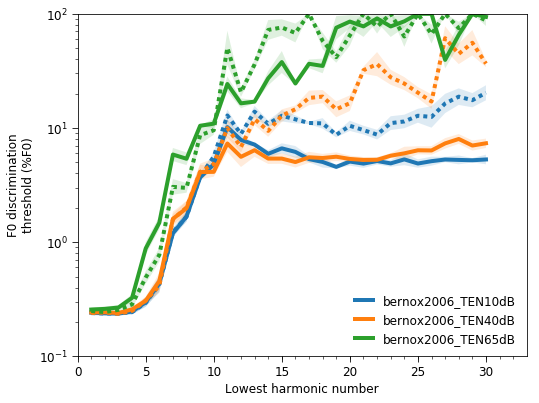

In [16]:
NROWS = 1
NCOLS = 1
figsize = (4*NCOLS*1.9, 3*NROWS*1.9)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)
ax = np.array(ax).reshape([-1])

color_list = util_figures.get_color_list(10, cmap_name='tab10')
for ax_idx, key in enumerate(experiment_keys):
    plot_fcn = experiment_to_plot_fcn_map[key]
    kwargs = {
        'include_yerr': True,
        'sine_plot_kwargs': {'label': key, 'color': color_list[ax_idx], 'lw': 4},
        'rand_plot_kwargs': {'label': None, 'color': color_list[ax_idx], 'lw': 4},
    }
    plot_fcn(ax[0], results_dicts[key], **kwargs)
#     plot_fcn(ax[ax_idx], experiment_to_human_results_map[key], **kwargs)

plt.tight_layout()
plt.show()

# model_name = regex_model_dir
# model_name = model_name.replace('/saved_models/models_sr20000/arch_0302/', '')
# model_name = model_name.replace('*/', '')
# model_name = 'arch_search_v01_rank_{:03}to{:03}'.format(idxxx, idxxx+40)
# # model_name = 'HUMANS'
# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_02_03_pitchnet_paper_figures/'
# save_fn = os.path.join(save_dir, 'all_psychophysics___{}.pdf')
# save_fn = save_fn.format(model_name)
# # fig.savefig(save_fn, bbox_inches='tight', pad_inches=0)
# print(save_fn)


In [30]:
# LOAD PSYCHOPHYSICS EXPERIMENT RESULTS FROM DIFFERENT MODELS

master_list = [
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_{}_bestckpt_results_dict.json', 'Train 1xBWs + Test 1xBWs'), 
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_TEST_BW20eN1_IHC3000Hz_ANMODEL_{}_bestckpt_results_dict.json', 'Train 1xBWs + Test 2xBWs'), 
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW20eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_{}_bestckpt_results_dict.json', 'Train 2xBWs + Test 2xBWs'), 

    ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_{}_bestckpt_results_dict.json', 'Train 1xBWs + Test 1xBWs'), 
    ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_TEST_BW20eN1_IHC3000Hz_ANMODEL_{}_bestckpt_results_dict.json', 'Train 1xBWs + Test 2xBWs'), 
    ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_{}_bestckpt_results_dict.json', 'Train 2xBWs + Test 2xBWs'), 

]
fill_value = 'bernox2006_TENlevel10dB_harmlevel20dBSPL'

model_keys = []
results_dicts = {}
master_count = 0
for fn_regex, model_key in master_list:
    results_dicts[model_key] = []
    model_keys.append(model_key)
    for results_dict_fn in sorted(glob.glob(fn_regex.format(fill_value))):
        master_count = master_count + 1
        with open(results_dict_fn) as f:
            results_dicts[model_key].append(json.load(f))

print('Loaded results from {} files ({})'.format(master_count, fill_value))
for key in results_dicts.keys():
    print(key, len(results_dicts[key]))


Loaded results from 30 files (bernox2006_TENlevel10dB_harmlevel20dBSPL)
Train 1xBWs + Test 2xBWs 10
Train 2xBWs + Test 2xBWs 10
Train 1xBWs + Test 1xBWs 10


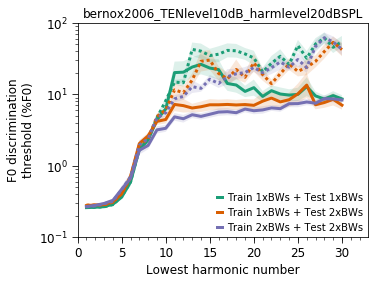

In [31]:
# PLOT PSYCHOPHYSICS EXPERIMENT RESULTS FROM DIFFERENT MODELS ON SAME AXES

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_bernox2005()

kwargs = {
    'include_yerr': True,
    'legend_on': True,
#     'restrict_conditions': [0],
    'kwargs_legend': {
        'ncol': 2,
        'handlelength': 0.5,
        'borderpad': 0,
        'columnspacing': 1,
        'loc': 'lower right',
        'handletextpad':0.5,
        'fontsize': 10
    },
}
if len(model_keys) < 4:
    kwargs['kwargs_legend']['ncol'] = 1
COLOR_LIST = util_figures.get_color_list(8, cmap_name='Dark2')


NROWS = 1
NCOLS = 1
figsize = (4*NCOLS*.9*1.5, 3*NROWS*.9*1.5)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)


### PLOT MODEL ###
for cidx, key in enumerate(model_keys):
    kwargs['sine_plot_kwargs'] = {
        'label': key,
        'color': COLOR_LIST[cidx],
        'lw': 3
    }
    kwargs['rand_plot_kwargs'] = {
        'label': None,
        'color': COLOR_LIST[cidx],
        'lw': 3
    }

    plot_fcn(ax, results_dicts[key], **kwargs)

ax.set_title(fill_value)

plt.tight_layout()
plt.show()


In [178]:
import sys
import os
import json
import numpy as np
import scipy.stats
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.cm
import matplotlib.colors

import f0dl_bernox
import f0dl_generalized
import util_human_model_comparison
import util_figures_psychophysics
import importlib
importlib.reload(f0dl_generalized)
importlib.reload(util_human_model_comparison)
importlib.reload(util_figures_psychophysics)

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures


model_dir_list = [
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC0050Hz_classification*/', '50Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC0250Hz_classification*/', '250Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC1000Hz_classification*/', '1000Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', '3000Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC6000Hz_classification*/', '6000Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC9000Hz_classification*/', '9000Hz'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_sr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order_classification*/', '50Hz**'),

#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_*/', '50Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC0250Hz_IHC7order/arch_*/', '250Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC1000Hz_IHC7order/arch_*/', '1000Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/', '3000Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC6000Hz_IHC7order/arch_*/', '6000Hz'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC9000Hz_IHC7order/arch_*/', '9000Hz'),
#     ('/nobackup/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_sr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/*/', '50Hz**'),

#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW05eN1_IHC3000Hz_classification*/', '2x narrower BWs'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/', 'Human filter BWs'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW20eN1_IHC3000Hz_classification*/', '2x broader BWs'),

    ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_*/', '2x narrower BWs'),
    ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/', 'Human filter BWs'),
    ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_*/', '2x broader BWs'),

#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_TEST_BW05eN1_IHC3000Hz_ANMODEL_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', '2x narrower BWs'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', 'Human filter BWs'),
#     ('/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_TEST_BW20eN1_IHC3000Hz_ANMODEL_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', '2x broader BWs'),

#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_TEST_BW05eN1_IHC3000Hz_ANMODEL_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', '2x narrower BWs'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', 'Human filter BWs'),
#     ('/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_TEST_BW20eN1_IHC3000Hz_ANMODEL_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', '2x broader BWs'),
]

if 'BW05' in model_dir_list[0][0]:
    basename, key_xval = ('EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json', 'snr_per_component')
else:
    basename, key_xval = ('EVAL_SOFTMAX_mcpherson2020_testSPL_v01_bestckpt_results_dict.json', 'dbspl')

list_model_name = []
list_list_results_dict = []
for (model_dir, model_name) in model_dir_list:
    regex_json_fn = model_dir
    if '.json' not in regex_json_fn:
        regex_json_fn = os.path.join(regex_json_fn, basename)
    list_model_name.append(model_name)
    list_results_dict = []
    for fn_results_dict in sorted(glob.glob(regex_json_fn)):
        if os.path.exists(fn_results_dict):
            with open(fn_results_dict) as f:
                results_dict = json.load(f)
            list_results_dict.append(results_dict)
    print(regex_json_fn, len(list_results_dict))
    list_list_results_dict.append(list_results_dict)


/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json 10
/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json 10
/om/scratch/*/msaddler/pitchnet/saved_models/arch_search_v01_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_*/EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json 10


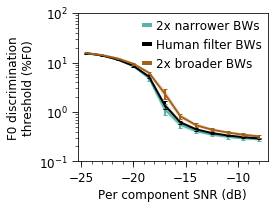

In [179]:
importlib.reload(util_figures_psychophysics)

color_list = np.array([[90,180,172], [0,0,0], [166,97,26]])/256 # CMAP FOR COCH FILTER BW

fig, ax = plt.subplots(figsize=(4, 3))
for cidx, (list_results_dict, model_name) in enumerate(zip(list_list_results_dict, list_model_name)):
    
    kwargs = {
        'key_xval': key_xval,
        'str_xlabel': 'Per component SNR (dB)',
        'xticks': 5,
        'xticks_minor': 1,
        'include_yerr': True,
        'plot_kwargs_update': {
            'color': color_list[cidx],
            'label': model_name,
            'lw': 2,
        },
        'kwargs_legend': {
            'ncol': 1,
            'handlelength': 0.5,
            'borderpad': 0,
            'columnspacing': 1,
            'loc': 'upper right',
            'handletextpad':0.5,
        },
    }
    
    util_figures_psychophysics.make_f0dl_threshold_plot(ax, list_results_dict, **kwargs)

import matplotlib
leg = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        legobj.set_linewidth(4.0)

plt.tight_layout()
plt.show()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/'
# # save_fn = os.path.join(save_dir, 'psychophysics_f0dl_vs_SNR_manipulation_cochFilterBWs.pdf')
# save_fn = os.path.join(save_dir, 'psychophysics_f0dl_vs_SNR_manipulation_cochFilterBWs_rep10archs.pdf')
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)


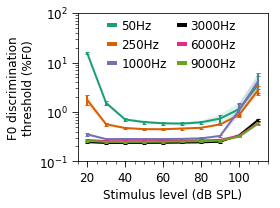

In [111]:
importlib.reload(util_figures_psychophysics)

color_list = util_figures.get_color_list(8, cmap_name='Dark2') # CMAP FOR IHC LOWPASS
color_list.insert(3, [0,0,0])

fig, ax = plt.subplots(figsize=(4, 3))
for cidx, (list_results_dict, model_name) in enumerate(zip(list_list_results_dict, list_model_name)):
    
    kwargs = {
        'key_xval': key_xval,
        'str_xlabel': 'Stimulus level (dB SPL)',
        'xlimits': [15, 115],
        'xticks': 20,
        'xticks_minor': 5,
        'include_yerr': True,
        'plot_kwargs_update': {
            'color': color_list[cidx],
            'label': model_name,
            'lw': 2,
        },
        'kwargs_legend': {
            'ncol': 2,
            'handlelength': 0.5,
            'borderpad': 0,
            'columnspacing': 1,
            'loc': 'upper center',
            'handletextpad':0.5,
        },
    }
    
    util_figures_psychophysics.make_f0dl_threshold_plot(ax, list_results_dict, **kwargs)

import matplotlib
leg = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        legobj.set_linewidth(4.0)

plt.tight_layout()
plt.show()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_04_28_pitchnet_paper_figures_v01/'
# save_fn = os.path.join(save_dir, 'psychophysics_f0dl_vs_dBSPL_manipulation_IHClowpass.pdf')
# # save_fn = os.path.join(save_dir, 'psychophysics_f0dl_vs_dBSPL_manipulation_IHClowpass_rep10archs.pdf')
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)
